#### Diffusion Equation

Computes numerical approximations of the solutions of the diffusion equation $u_{t} = k_0u_{xx}$.

Paul J. Atzberger  <br>
http://atzberger.org <br>


In [1]:
# load needed packages
import numpy as np;
import matplotlib;
import matplotlib.pyplot as plt;  

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

In [2]:
print("setup the paramaters and initial conditions")
deltaT = 1e-2; num_pts = int(5e2) + 1; L = 1e1; k_0 = 1e0; A = 1e0;
x = np.linspace(-L,L,num_pts); deltaX = x[1] - x[0];

num_timesteps = int(1.5e2);

run_case = 'hat1';

if run_case == 'hat1':
  L1 = 0.2*L;
  i0 = int(np.round((0 + L)/deltaX));
  i1 = int(np.round((-L1 + L)/deltaX)); i2 = int(np.round((L1 + L)/deltaX));
  A = 3.0/L1;
  phi = 0*x; 
  xx = x[i1:i0+1]; phi[i1:i0+1] = A*(xx + L1); 
  xx = x[i0:i2]; phi[i0:i2] = A*(L1 - xx);  
else:
  raise Exception('case not recognized');

setup the paramaters and initial conditions


In [3]:
print("solve the diffusion equation using a numerical approximation for the integral");
# compute the solution
u_list = [];
for k in range(0,num_timesteps):
  num_x = x.shape[0]; t = k*deltaT; u = 0*x;
  if k % 10 == 0: print("k = %.4d"%k)
  for j in range(0,num_x):
    x1 = x[j]; i1 = 0; i2 = num_pts - 1;
    if k > 0:
      sigma_sq = 2*k_0*t;    
      integrand = (1.0/np.sqrt(2*np.pi*sigma_sq))*np.exp(-np.power(x-x[j],2)/(2*sigma_sq))*phi;
      int_sol = 0.5*deltaX*(integrand[i1] + 2.0*np.sum(integrand[i1+1:i2-1] + integrand[i2]));
    else:
      int_sol = phi[j]; # integrand approximates dirac-delta function in this case
    u[j] = int_sol;
                          
  u_list.append(u);

solve the diffusion equation using a numerical approximation for the integral
k = 0000
k = 0010
k = 0020
k = 0030
k = 0040
k = 0050
k = 0060
k = 0070
k = 0080
k = 0090
k = 0100
k = 0110
k = 0120
k = 0130
k = 0140


show the results


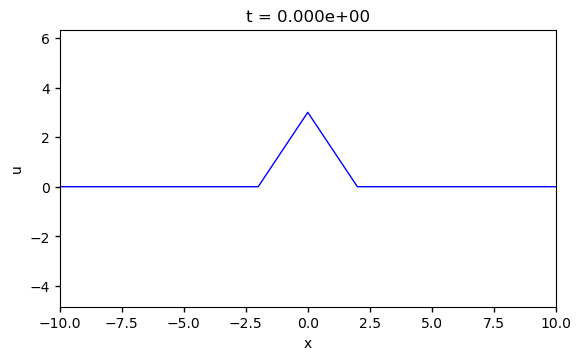

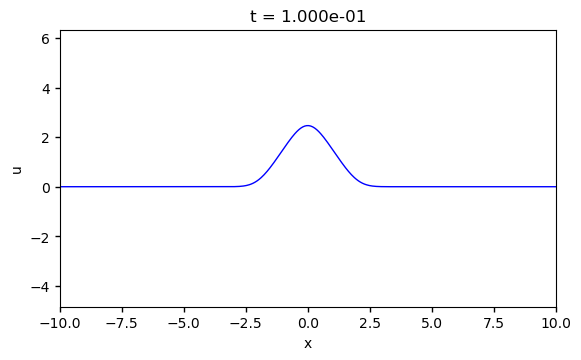

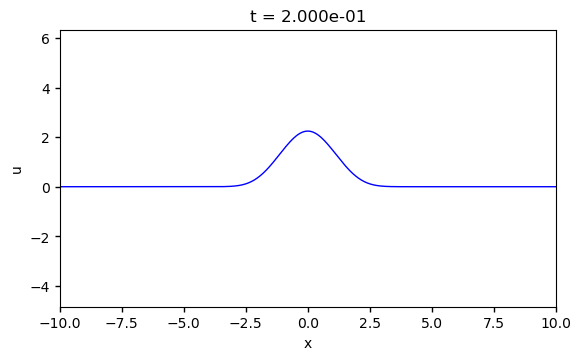

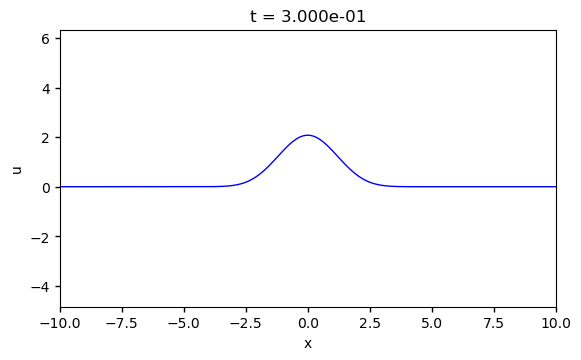

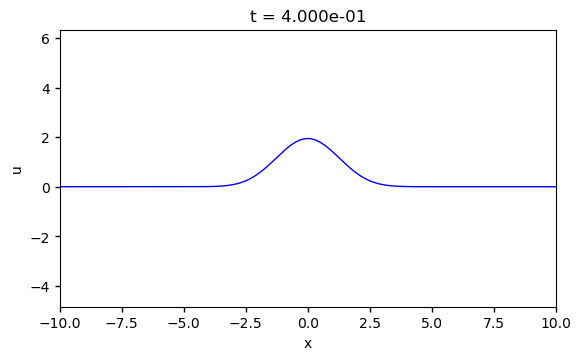

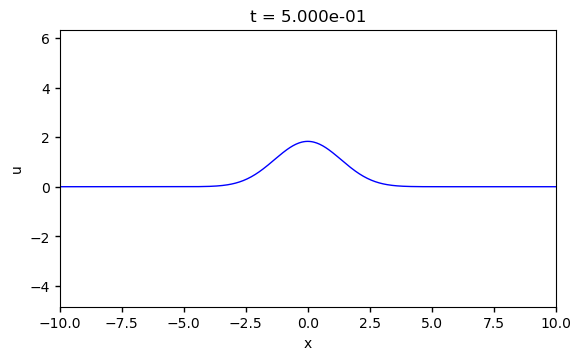

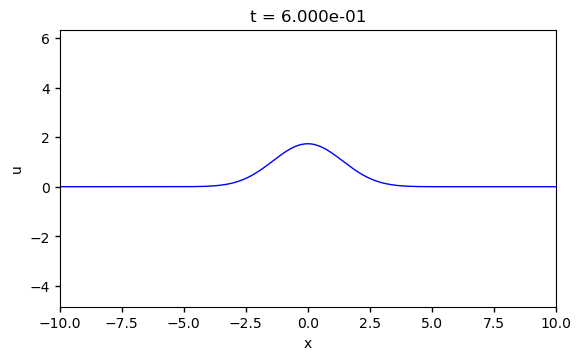

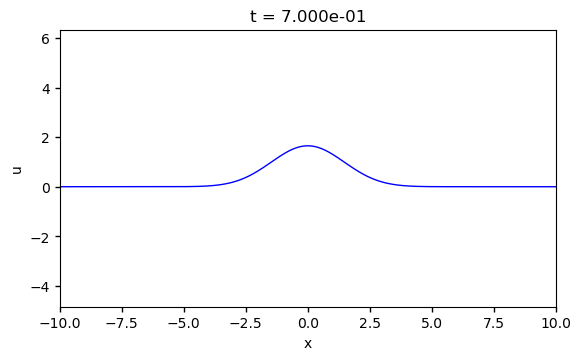

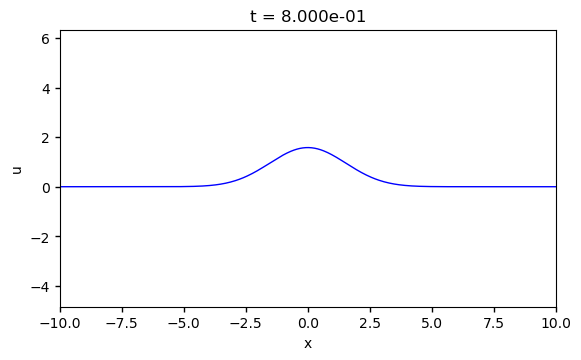

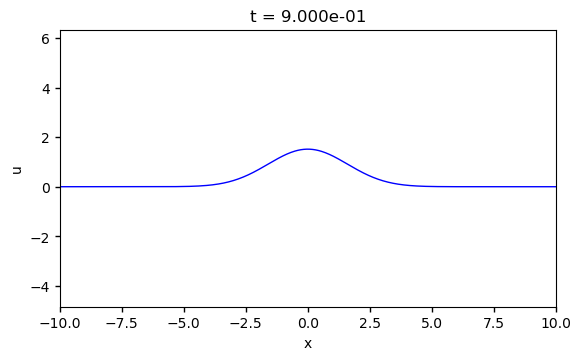

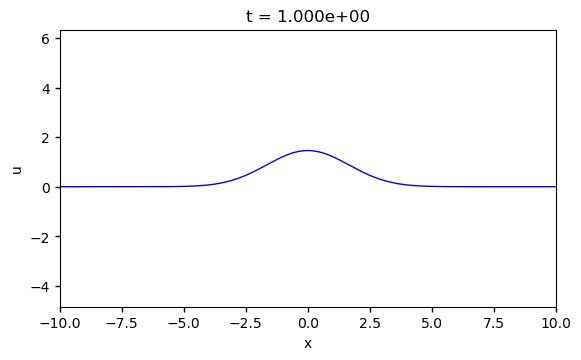

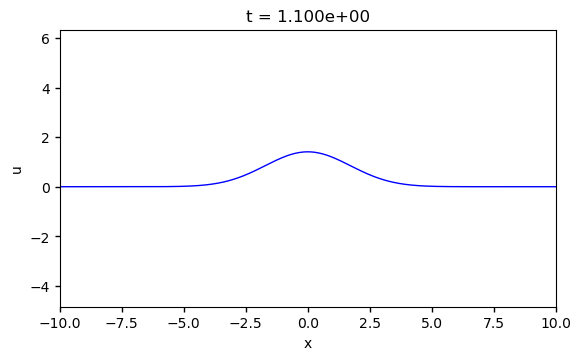

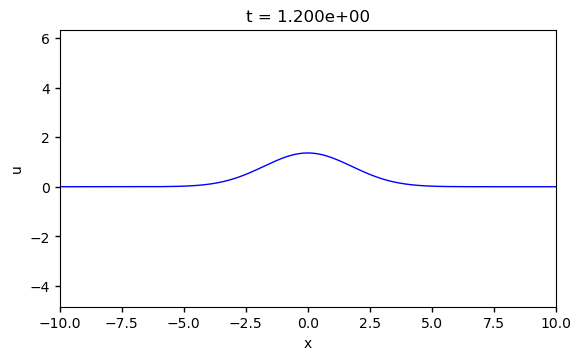

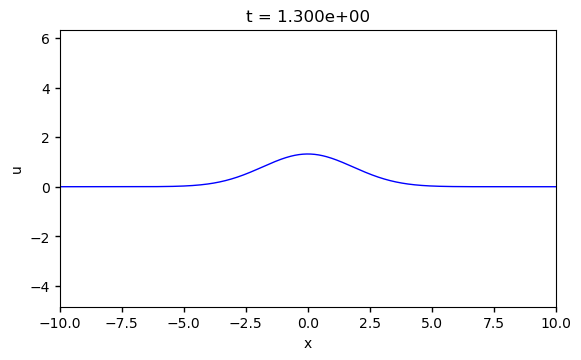

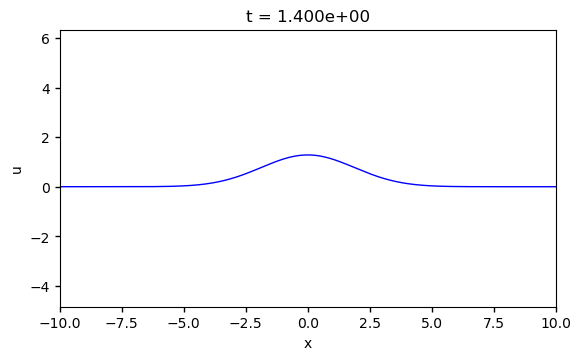

In [4]:
print("show the results");
# Plot the results 
num_show = 15; skip = int(num_timesteps/num_show);
for k in range(0,num_timesteps,skip):
  u = u_list[k];
  # plot the result u(x,t) 
  plt.figure('diffusion equ t=%.3d'%k,figsize=(19.2/3.0,10.8/3.0));
  plt.clf();  
  plt.title('t = %.3e'%(k*deltaT));  
  plt.plot(x,u,'b-',lw=1);
  plt.xlabel('x'); plt.ylabel('u');
  plt.axis('equal');
  plt.xlim([-L,L]); plt.ylim([0,A]);
  ax = plt.gca();
  ax.xaxis.set_tick_params(width=1);
  ax.yaxis.set_tick_params(width=1);

  #for axis in ['top','bottom','left','right']:
  #  ax.spines[axis].set_linewidth(3);
  #  #ax.spines[axis].set_color("gold")
  #  ax.spines[axis].set_zorder(0)

  plt.draw(); 